# Modelo de Ising (el problema de Onsanger)

Aquino Chapa Martha Abril

In [1]:
using Plots
using Roots
using BenchmarkTools

┌ Info: Precompiling BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]
└ @ Base loading.jl:1278


In [13]:
#También declaramos las constantes
kb = 1
J=0.5

0.5

Iniciamos creando la red cuadrada de $N^2$ elementos, la cual en vez de presentarla como una matriz será un arreglo

$$RED = [1,2,3,...,N^2] $$

In [3]:
#función que genera una red considerando de manera aleatoria los elememtos de la red: -1 o 1
#El total de elementos en la red es N^2
function generador_de_red(N)
    return  [rand([-1,1]) for i in 1:N^2]
end

generador_de_red (generic function with 1 method)

In [25]:
#Probando la función:
N=3 #20,40,50
red_prueba = generador_de_red(N);

Ahora generamos un arreglo en el cual en cada fila se encuentren acomodados los vecinos del i-ésimo elemento. 
Estarán acomodados de la siguiente manera: [vecino de arriba, vecino de la derecha, vecino de abajo, vecino de la izquierda]

In [4]:
function generador_indice_vecinos(red)
    N² = length(red)
    N= Int((N²)^(1/2))
    v = zeros(Int64,(N²,4))
    #v[i] = [arriba, derecha, abajo, izquierda]

    #Obtenemos el arreglado donde acomodamos los situos de los
    
    #Iniciamos a indexar los vecinos de arriba
    for j in 1:N²
        if j+N<= N²
            v[j,1] = j+N 

        elseif j+N>N²
            v[j,1] = j - N*(N-1)
        end

        #Para los vecinos de la derecha
        if j%N != 0 
            v[j,2] = j+1
        elseif j%N ==0
            v[j,2] = j-N+1 
        end


        #Para los vecinos de abajo

        if j-N>=1
            v[j,3] = j-N
        elseif j-N<1
            v[j,3] =j+N*(N-1)
        end

        #Para los vecinos izquierda

        if (j-1)%N != 0
            v[j,4] = j-1
        elseif (j-1)%N ==0
            v[j,4] = j+N-1
        end
    end
    #Regresamos el arreglo donde están los vecinos
    return v
end

generador_indice_vecinos (generic function with 1 method)

In [26]:
#Probando la función con la red de prueba
vecinos_prueba = generador_indice_vecinos(red_prueba)
#print(vecinos_prueba[1,3])

9×4 Array{Int64,2}:
 4  2  7  3
 5  3  8  1
 6  1  9  2
 7  5  1  6
 8  6  2  4
 9  4  3  5
 1  8  4  9
 2  9  5  7
 3  7  6  8

En el modelo de Ising considerando geometría cuadrada se tiene que la energía de interacción de un elemento con sus vecinos está dada por
$$E= -J\sum_{<ij>}S_iS_j $$

Por lo que la energía de un elemento se calcula con la siguiente función

Creamos una función que nos devuelva la energía total del sistema 

In [73]:
function energia_total_del_sistema(red_lista,vecinos_lista,J)### Indice del elemento de 
    #Creamos un arreglo donde iremos sumando cada elemento de la suma de la energía total
    energia_total = 0
    #Creamos un arreglo que obtenga la energía de interacción de cada elemento de la red
    N² = length(red_lista)
    for i in 1:N²
        #Multiplicamos el spin[i] por sus vecinos
        vecinos_x_spin = red_lista[i]*vecinos_lista[i]
        #sumamos los elementos del arreglo anterior para obtener el valor de la energía de ese elemento en la red
        energia_spin = sum(vecinos_x_spin)
        
        #sumamos la energía del lugar i a la energía total
        energia_total += energia_spin
    end
    return energia_total
end

energia_total_del_sistema (generic function with 1 method)

In [27]:
energia_total_prueba = energia_total_del_sistema(red_prueba,vecinos_prueba,0.1)

-6.5

In [29]:
function magnetizacion(red_lista)
    return sum(red_lista)
end

magnetizacion (generic function with 1 method)

In [28]:
magnetizacion_prueba = magnetizacion(red_prueba)

-1

### Implementando el algoritmo de Metropolis con Monte Carlo 

Generando el algoritmo de Metropolis
$$\frac{p_i}{p_j} = e^{(-\beta(E_i-E_j))} $$
y queremos encontrar el estado de equilibrio

In [30]:
function energia_por_elemento(elemento,elemento_indice,vecinos_indices,red_lista,J)### Indice del elemento de 
    #Variable donde se almacenará la suma de los elementos de la energía
    energia_suma = 0
    for i in 1:4
        indice_vecino = Int(vecinos_indices[elemento_indice,i])
        energia_suma += elemento*red_lista[indice_vecino]
    end
    return energia_suma*(-J)
    
end

energia_por_elemento (generic function with 1 method)

In [77]:
function ising(red_inicial,β)#Q son las iteraciones máximas
    N² = Int(length(red_inicial))
    Q=7000
    red_inicial = copy(red_inicial)
    #contando el spin total y la energia total en cada iteracion, omitiendo los de la primera
    #iteracion
    energias = zeros(Q)
    spines = zeros(Q)
    vecinos = generador_indice_vecinos(red_inicial)
    for i in 1:Q
        #Definimos el elemento al que se le cambiará el spin aleatoriamente 
        x = Int(rand(1:length(red_inicial)))
        #sus vecinos 
        
        #cambiamos el spin en la copia de la red
        spin_inicial = red_inicial[x] 
        #La propuesta para cambiar el spin
        spin_final = spin_inicial*(-1)
        energia_inicial = energia_por_elemento(spin_inicial,Int(x),vecinos,red_inicial,J)
    
        energia_final = energia_inicial = energia_por_elemento(spin_final,x,vecinos,red_inicial,J)
        
        dE= energia_final-energia_inicial
        if dE<0
            red_inicial[x] = spin_final
        elseif (rand()<exp(-β*dE))
            red_inicial[x] = spin_final
        end
        spines[i] = sum(red_inicial)
        energias[i] = energia_total_del_sistema(red_inicial,vecinos,J)
    end
    return spines, energias
end

ising (generic function with 2 methods)

In [78]:
spines, energias = ising(red_prueba,1)

([1.0, -1.0, -3.0, -1.0, -3.0, -1.0, -3.0, -5.0, -3.0, -1.0  …  1.0, 3.0, 1.0, -1.0, -3.0, -1.0, -3.0, -1.0, 1.0, 3.0], [-9.0, -11.0, -17.0, -9.0, -17.0, -9.0, -13.0, -23.0, -19.0, -7.0  …  7.0, 13.0, -1.0, -3.0, -15.0, 3.0, -13.0, -11.0, 1.0, 11.0])

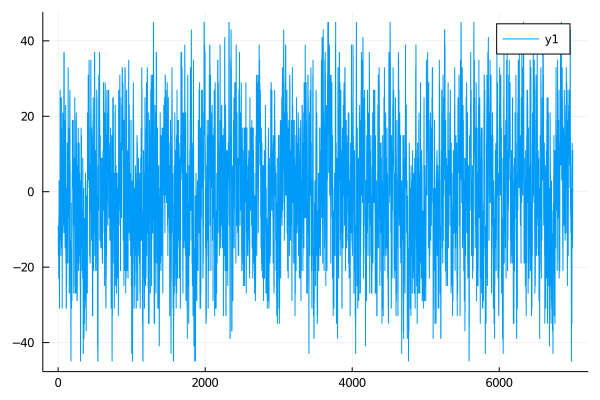

In [79]:
plot(energias)
       

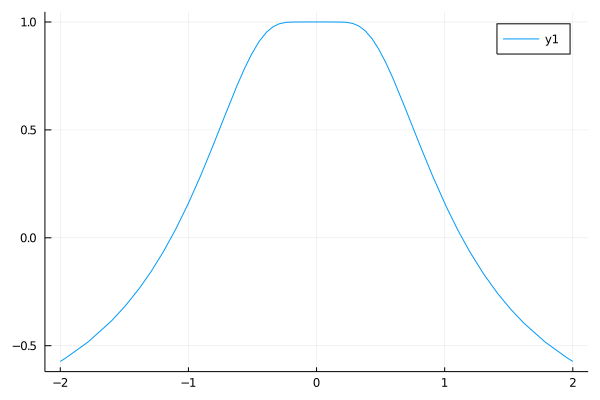

In [9]:
f(x) = 2*(tanh(2*0.5/(kb*x)))^2-1
plot(f, -2 ,2)


In [10]:
Tc = find_zeros(f, 0, 5) 

1-element Array{Float64,1}:
 1.1345926571065108

### Tiempos de ejecución 

In [43]:
red_20 = generador_de_red(20) 
@benchmark ising(red_20,1/(1.1345926571065108))

BenchmarkTools.Trial: 1504 samples with 1 evaluation.
 Range (min … max):  2.905 ms …   6.887 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     3.072 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   3.313 ms ± 586.152 μs  ┊ GC (mean ± σ):  0.93% ± 4.70%

  ▁▆█▇▅▅▃▃▁      ▁▁▃▁                                          
  █████████▇█▇█▇▇█████▇▇▅▇▆▄▄▆▇▇▅▆▆▅▅▅▅▆▄▅▅▄▄▅▆▆▄▅▆▇▅█▆▆▄▅▁▅▅ █
  2.9 ms       Histogram: log(frequency) by time      5.67 ms <

 Memory estimate: 641.06 KiB, allocs estimate: 35007.

In [45]:
red_40 = generador_de_red(40) 
@benchmark ising(red_40,1/(1.1345926571065108))   

BenchmarkTools.Trial: 342 samples with 1 evaluation.
 Range (min … max):  12.035 ms … 29.986 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     13.017 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   14.563 ms ±  3.480 ms  ┊ GC (mean ± σ):  0.60% ± 3.07%

  ▆█▆▅▃▂▃▃▂▁  ▁                                                
  █████████████▇▆▆▄█▆▆▄▄▆█▄▁▄▆█▁▁▄▆▇▄▆▄▁▆▆▄▁▁▁▄▆▆▆▁▁▄▁▁▁▁▁▆▁▄ ▆
  12 ms        Histogram: log(frequency) by time      28.2 ms <

 Memory estimate: 791.02 KiB, allocs estimate: 41608.

In [46]:
red_50 = generador_de_red(50) 
@benchmark ising(red_50,1/(1.1345926571065108))

BenchmarkTools.Trial: 227 samples with 1 evaluation.
 Range (min … max):  18.439 ms … 47.959 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     19.854 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   21.977 ms ±  4.668 ms  ┊ GC (mean ± σ):  0.39% ± 2.41%

  ▃██▃▂                                                        
  █████▇▅▄▄▃▄▃▂▄▃▃▃▃▃▁▃▃▃▁▂▁▃▂▃▃▃▂▁▁▂▂▃▂▁▁▂▃▁▂▃▂▁▁▂▁▁▁▁▁▁▁▁▁▂ ▃
  18.4 ms         Histogram: frequency by time        39.1 ms <

 Memory estimate: 844.97 KiB, allocs estimate: 42813.

In [47]:
red_100 = generador_de_red(100) 
@benchmark ising(red_100,1/(1.1345926571065108))

BenchmarkTools.Trial: 68 samples with 1 evaluation.
 Range (min … max):  67.230 ms … 102.927 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     72.264 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   74.295 ms ±   6.891 ms  ┊ GC (mean ± σ):  0.11% ± 0.88%

    ▆█▁▁█▃▁   ▃ ▃   ▁                                           
  ▄▁███████▁▇▄█▁█▇▄▁█▇▇▁▁▇▄▁▁▁▄▁▁▇▄▁▁▄▁▁▁▄▄▁▁▇▄▁▁▁▁▁▁▁▁▁▁▁▁▁▄▄ ▁
  67.2 ms         Histogram: frequency by time         92.9 ms <

 Memory estimate: 1.14 MiB, allocs estimate: 44425.

In [ ]:
malla_elementos = [20,40,50,100]
for i in malla_elementos
    red = generador_de_red(i) 
   plot!() 
end

### Calculando cuanto tiempo se tarda en pasar de un estado frío a uno caliente

In [66]:
red_fria_20 = [-1 for i in 1:40]

40-element Array{Int64,1}:
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

In [71]:
red_fria = [-1 for 1:20]
ising(red_fria,1/(1.1345926571065108))

LoadError: syntax: invalid iteration specification